In [1]:
import pandas as pd ; import numpy as np

In [22]:
vs = pd.DataFrame({"anahtar1":list("aabbab"),
                  "anahtar2":["bir","iki","uc"]*2,
                  "veri1":np.random.randn(6),
                  "veri2":np.random.randn(6)})
vs

,anahtar1,anahtar2,veri1,veri2
0,a,bir,-1.673431,0.918564
1,a,iki,-1.629610,0.477620
2,b,uc,1.920473,-1.175671
3,b,bir,2.310217,-0.815943
4,a,iki,-0.309244,1.195802
5,b,uc,-0.858677,-0.813497


In [23]:
grup=vs["veri1"].groupby(vs["anahtar1"])

In [24]:
grup

In [25]:
grup.mean()

anahtar1
a   -1.204095
b    1.124004
Name: veri1, dtype: float64

In [26]:
ort=vs["veri1"].groupby([vs["anahtar1"],vs["anahtar2"]]).mean()
ort

anahtar1  anahtar2
a         bir        -1.673431
          iki        -0.969427
b         bir         2.310217
          uc          0.530898
Name: veri1, dtype: float64

In [27]:
ort.unstack()
# tablo şelinde sundu

anahtar2,bir,iki,uc
anahtar1,,,
a,-1.673431,-0.969427,NaN
b,2.310217,NaN,0.530898


In [28]:
for isim, grup in vs.groupby("anahtar1"):
    print(isim)
    print(grup)

a
  anahtar1 anahtar2     veri1     veri2
0        a      bir -1.673431  0.918564
1        a      iki -1.629610  0.477620
4        a      iki -0.309244  1.195802
b
  anahtar1 anahtar2     veri1     veri2
2        b       uc  1.920473 -1.175671
3        b      bir  2.310217 -0.815943
5        b       uc -0.858677 -0.813497


In [30]:
for(x1,x2),grup in vs.groupby(["anahtar1","anahtar2"]):
    print(x1,x2)
    print(grup)

a bir
  anahtar1 anahtar2     veri1     veri2
0        a      bir -1.673431  0.918564
a iki
  anahtar1 anahtar2     veri1     veri2
1        a      iki -1.629610  0.477620
4        a      iki -0.309244  1.195802
b bir
  anahtar1 anahtar2     veri1     veri2
3        b      bir  2.310217 -0.815943
b uc
  anahtar1 anahtar2     veri1     veri2
2        b       uc  1.920473 -1.175671
5        b       uc -0.858677 -0.813497


In [31]:
part=dict(list(vs.groupby("anahtar1")))

In [33]:
part["a"]

,anahtar1,anahtar2,veri1,veri2
0,a,bir,-1.673431,0.918564
1,a,iki,-1.629610,0.477620
4,a,iki,-0.309244,1.195802


In [40]:
game = pd.read_csv("vgsales.csv")

In [42]:
game.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.0,0.01,1.15
1,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.0,0.01,0.77
2,Ice Hockey,2600,1980.0,Sports,Activision,0.46,0.03,0.0,0.01,0.49
3,Freeway,2600,1980.0,Action,Activision,0.32,0.02,0.0,0.00,0.34
4,Bridge,2600,1980.0,Misc,Activision,0.25,0.02,0.0,0.00,0.27


In [43]:
game.dtypes

Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [44]:
game.dropna().describe()
# özet

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16290.000000,16290.000000,16290.000000,16290.000000,16290.000000,16290.000000
mean,2006.404727,0.265646,0.147740,0.078838,0.048428,0.540926
std,5.831618,0.822457,0.509317,0.311888,0.190089,1.567391
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,2017.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [45]:
game.Global_Sales.mean()

0.5384406554205212

In [46]:
grup=game.groupby("Genre")
# türlere göre

In [47]:
grup["Global_Sales"].count()
# türlere göre satışlar

Genre
Action          3309
Adventure       1282
Fighting         846
Misc            1712
Platform         884
Puzzle           581
Racing          1248
Role-Playing    1486
Shooter         1308
Simulation       862
Sports          2343
Strategy         678
Name: Global_Sales, dtype: int64

In [49]:
grup["Global_Sales"].describe()

,count,mean,std,min,25%,50%,75%,max
Genre,,,,,,,,
Action,3309.0,0.528960,1.157485,0.01,0.0700,0.190,0.5000,21.40
Adventure,1282.0,0.186248,0.514023,0.01,0.0200,0.060,0.1600,11.18
Fighting,846.0,0.526832,0.953247,0.01,0.0800,0.205,0.5500,13.04
Misc,1712.0,0.468546,1.324555,0.01,0.0600,0.160,0.4100,29.02
Platform,884.0,0.939898,2.587950,0.01,0.0900,0.280,0.7950,40.24
Puzzle,581.0,0.421583,1.562969,0.01,0.0400,0.110,0.3100,30.26
Racing,1248.0,0.586562,1.663023,0.01,0.0700,0.190,0.5300,35.82
Role-Playing,1486.0,0.624031,1.708920,0.01,0.0700,0.190,0.5275,31.37
Shooter,1308.0,0.793058,1.818405,0.01,0.0800,0.230,0.7300,28.31


In [55]:
grup.mean(max)

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,,
Action,2007.906183,0.265198,0.158634,0.048199,0.056618,0.528960
Adventure,2008.127943,0.082426,0.049984,0.040554,0.013112,0.186248
Fighting,2004.630383,0.262317,0.118463,0.103251,0.042837,0.526832
Misc,2007.300119,0.236373,0.124959,0.062921,0.043937,0.468546
Platform,2003.811429,0.505713,0.227523,0.147930,0.058360,0.939898
Puzzle,2005.228070,0.213046,0.087384,0.098640,0.021601,0.421583
Racing,2004.835102,0.287997,0.191010,0.045425,0.061915,0.586562
Role-Playing,2007.051020,0.220242,0.126548,0.237052,0.040114,0.624031
Shooter,2005.918877,0.445405,0.239480,0.029266,0.078509,0.793058


In [56]:
%matplotlib inline

<Axes: xlabel='Genre'>

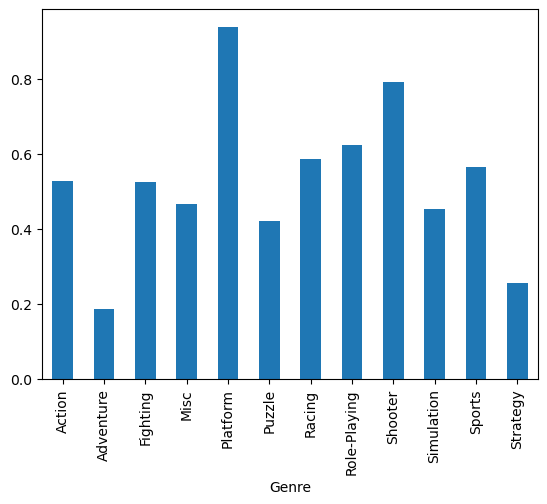

In [57]:
grup["Global_Sales"].mean().plot(kind="bar")

<Axes: xlabel='Genre'>

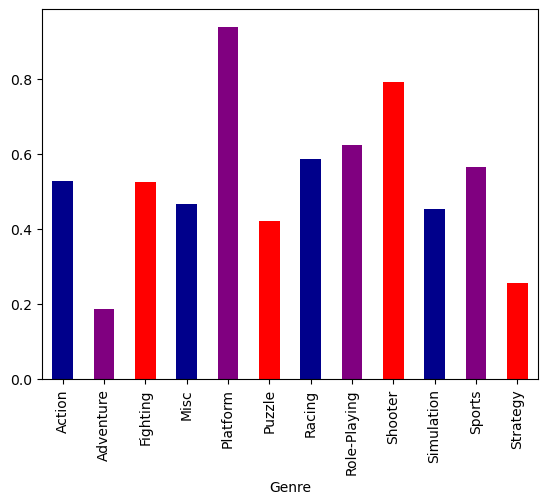

In [61]:
grup["Global_Sales"].mean().plot(kind="bar", color=["darkblue", "purple", "red"])

In [62]:
meyve=pd.DataFrame(np.random.randn(4,4),
                  columns=list("abcd"),
                  index=["apple","chery","banana","kiwi"])
meyve

,a,b,c,d
apple,-0.324788,-0.346592,0.306258,0.213628
chery,1.449503,0.116907,-0.729268,-1.164121
banana,0.984437,-1.274536,1.813142,-0.645489
kiwi,1.140410,-1.957308,1.137255,-0.034091


In [63]:
etiket = {"a":"green","b":"yellow","c":"green","d":"yellow","e":"purple"}

In [64]:
grup=meyve.groupby(etiket,axis=1)

C:\Users\ibrahim\AppData\Local\Temp\ipykernel_20088\1504124730.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  grup=meyve.groupby(etiket,axis=1)


In [65]:
grup.sum()

,green,yellow
apple,-0.018531,-0.132963
chery,0.720234,-1.047214
banana,2.797580,-1.920025
kiwi,2.277664,-1.991398


In [66]:
s=pd.Series(etiket)
s

a     green
b    yellow
c     green
d    yellow
e    purple
dtype: object

In [68]:
meyve.groupby(s,axis=1).count()

C:\Users\ibrahim\AppData\Local\Temp\ipykernel_20088\2646195204.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  meyve.groupby(s,axis=1).count()


,green,yellow
apple,2,2
chery,2,2
banana,2,2
kiwi,2,2


In [69]:
game=pd.read_csv("vgsales.csv")

In [70]:
game.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.0,0.01,1.15
1,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.0,0.01,0.77
2,Ice Hockey,2600,1980.0,Sports,Activision,0.46,0.03,0.0,0.01,0.49
3,Freeway,2600,1980.0,Action,Activision,0.32,0.02,0.0,0.00,0.34
4,Bridge,2600,1980.0,Misc,Activision,0.25,0.02,0.0,0.00,0.27


In [71]:
game.dropna().describe()
# dropna ile eksik verileri kaldırıyoruz

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16290.000000,16290.000000,16290.000000,16290.000000,16290.000000,16290.000000
mean,2006.404727,0.265646,0.147740,0.078838,0.048428,0.540926
std,5.831618,0.822457,0.509317,0.311888,0.190089,1.567391
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,2017.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [73]:
game.Global_Sales.mean()

0.5384406554205212

In [74]:
grup=game.groupby("Genre")

In [76]:
grup["Global_Sales"].count()

Genre
Action          3309
Adventure       1282
Fighting         846
Misc            1712
Platform         884
Puzzle           581
Racing          1248
Role-Playing    1486
Shooter         1308
Simulation       862
Sports          2343
Strategy         678
Name: Global_Sales, dtype: int64

In [77]:
grup["Global_Sales"].describe()

,count,mean,std,min,25%,50%,75%,max
Genre,,,,,,,,
Action,3309.0,0.528960,1.157485,0.01,0.0700,0.190,0.5000,21.40
Adventure,1282.0,0.186248,0.514023,0.01,0.0200,0.060,0.1600,11.18
Fighting,846.0,0.526832,0.953247,0.01,0.0800,0.205,0.5500,13.04
Misc,1712.0,0.468546,1.324555,0.01,0.0600,0.160,0.4100,29.02
Platform,884.0,0.939898,2.587950,0.01,0.0900,0.280,0.7950,40.24
Puzzle,581.0,0.421583,1.562969,0.01,0.0400,0.110,0.3100,30.26
Racing,1248.0,0.586562,1.663023,0.01,0.0700,0.190,0.5300,35.82
Role-Playing,1486.0,0.624031,1.708920,0.01,0.0700,0.190,0.5275,31.37
Shooter,1308.0,0.793058,1.818405,0.01,0.0800,0.230,0.7300,28.31


In [82]:
grup.mean(int)
# sözcük felan içeriyorsa int float yaz

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,,
Action,2007.906183,0.265198,0.158634,0.048199,0.056618,0.528960
Adventure,2008.127943,0.082426,0.049984,0.040554,0.013112,0.186248
Fighting,2004.630383,0.262317,0.118463,0.103251,0.042837,0.526832
Misc,2007.300119,0.236373,0.124959,0.062921,0.043937,0.468546
Platform,2003.811429,0.505713,0.227523,0.147930,0.058360,0.939898
Puzzle,2005.228070,0.213046,0.087384,0.098640,0.021601,0.421583
Racing,2004.835102,0.287997,0.191010,0.045425,0.061915,0.586562
Role-Playing,2007.051020,0.220242,0.126548,0.237052,0.040114,0.624031
Shooter,2005.918877,0.445405,0.239480,0.029266,0.078509,0.793058


<Axes: xlabel='Genre'>

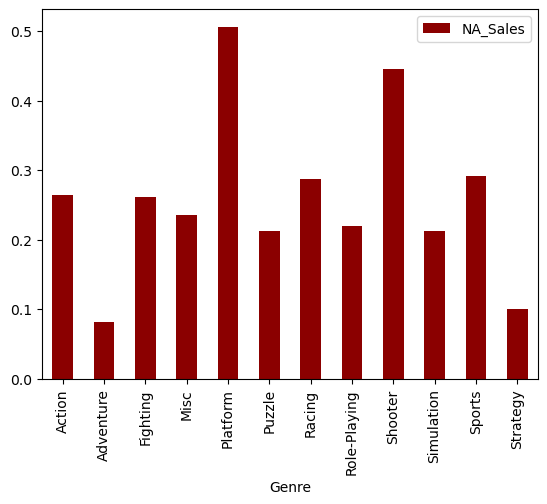

In [85]:
grup[["NA_Sales"]].mean().plot(kind="bar",color="darkred")

<Axes: xlabel='Genre'>

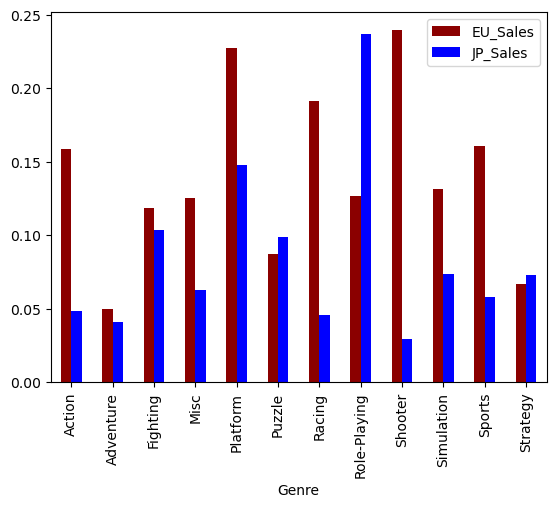

In [92]:
grup[["EU_Sales","JP_Sales"]].mean().plot(kind="bar",color=["darkred","blue"])